<a href="https://colab.research.google.com/github/mjcrgn/data_credential/blob/master/210128_unemployment_insurance_claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unimployment Insurance Claims Group Project

###*Group: Adrian, Eric, MJ, Olivia, Sukhyang*

Perform a comprehensive EDA on the provided dataset.
Try to determine using regression analysis a projection trend from the data.
Do you foresee a downtrend or uptrend according to your results?

#Import data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/qc/school/CSCI/data credential/projects/data/210128 unemployment insurance.csv',
    index_col = 'Period Ending',    # Sets Period Ending column as index
    parse_dates = True              # Converts column into datetime objects 
)

In [ ]:
df

,Region,Initial Claims
Period Ending,,
2003-07-31,Capital,4326
2003-07-31,Central New York,4366
2003-07-31,Finger Lakes,7095
2003-07-31,Hudson Valley,8454
2003-07-31,Long Island,13575
...,...,...
2020-12-31,Mohawk Valley,5489
2020-12-31,New York City,84695
2020-12-31,North Country,4286


#Exploratory Data Analysis

###Which region had the most claims?

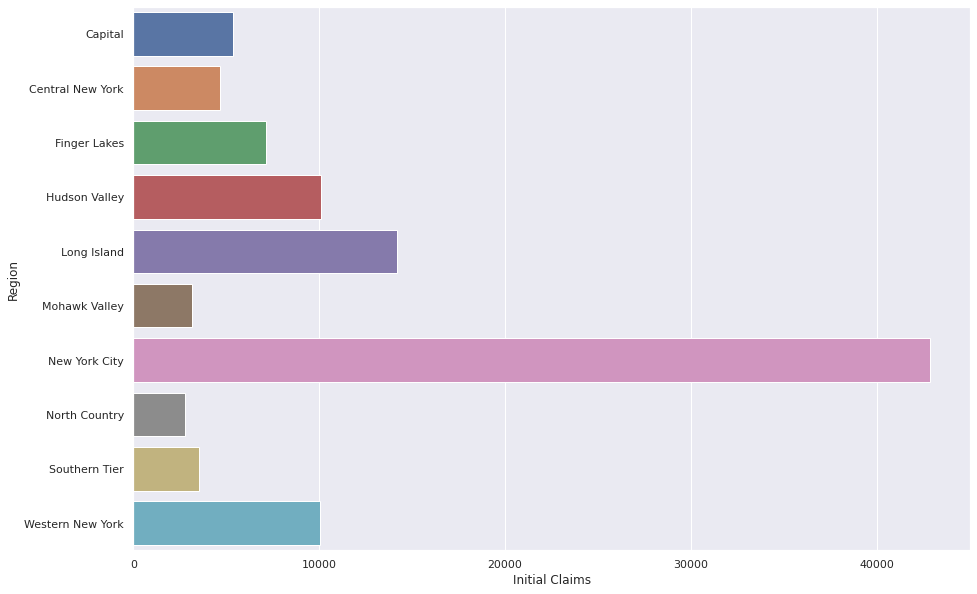

In [ ]:
sns.barplot(
    data = df,
    x = df['Initial Claims'],
    y = df['Region'],
    ci = False
)
sns.set(rc = {'figure.figsize': (15, 10)});

New York City had the most claims for unemployment insurance. As New York City accounts for roughly 40% of the total population of New York state, the large discrepancy in the number of claims in this region is expected.


###What do the number of unemployment insurance claims look like over time?

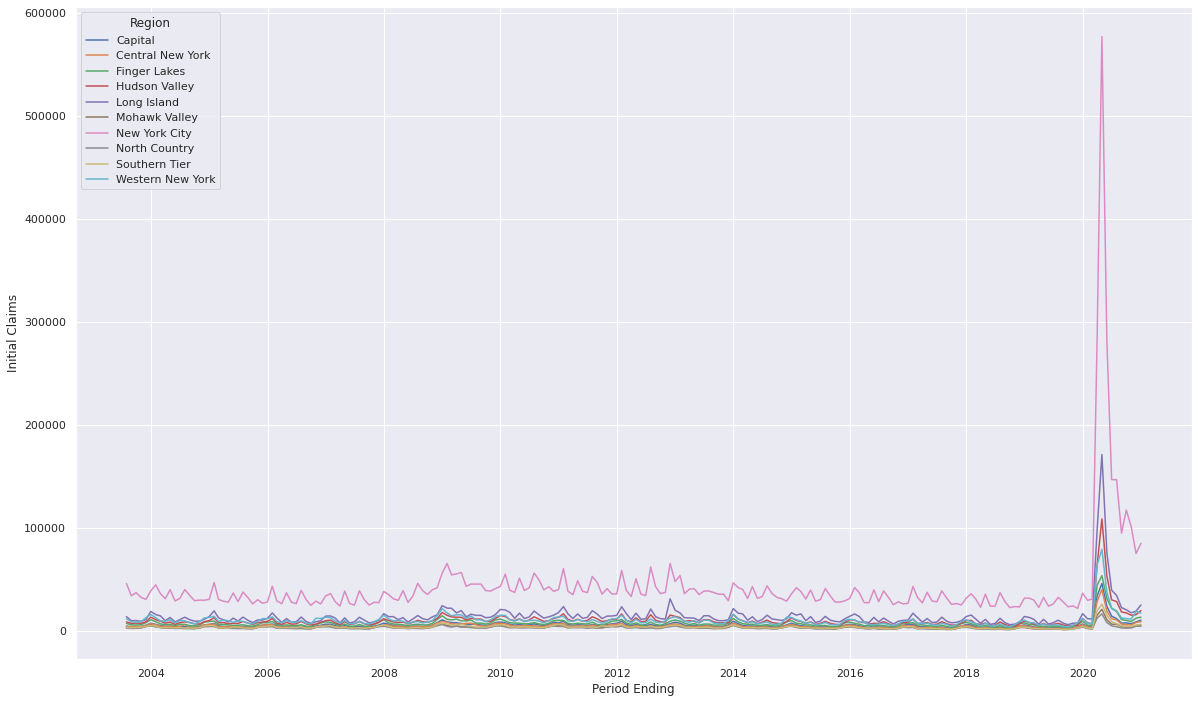

In [ ]:
sns.lineplot(
    x = df.index,
    y = df['Initial Claims'],
    hue = df['Region']
)
sns.set(rc = {'figure.figsize': (20, 12)});

We see a small rise in claims from about 2009 to 2013, and a meteoric spike beginning in 2020. The time periods when unemployment claims increase align with the stock market crash of 2008 and subsequent recovery of the economy, and with the arrival of COVID-19 in the United States in early 2020.

#Isolate 2020

As we all know, 2020 was an unprecedented year. We saw the arrival of COVID-19 to the United States, and the ensuing pandemic drove unemployment claims to new heights.

We will isolate data from 2020 to find a trend for unemployment claims in New York state going forward.

In [ ]:
df_2020 = df.copy()
df_2020 = df_2020['2020-01-31':] # Source: https://stackoverflow.com/questions/49868647/how-to-slice-a-pandas-dataframe-based-on-datetime-index
df_2020

,Region,Initial Claims
Period Ending,,
2020-01-31,Capital,3961
2020-01-31,Central New York,3555
2020-01-31,Finger Lakes,5365
2020-01-31,Hudson Valley,7461
2020-01-31,Long Island,11537
...,...,...
2020-12-31,Mohawk Valley,5489
2020-12-31,New York City,84695
2020-12-31,North Country,4286


###Insurance claims in 2020

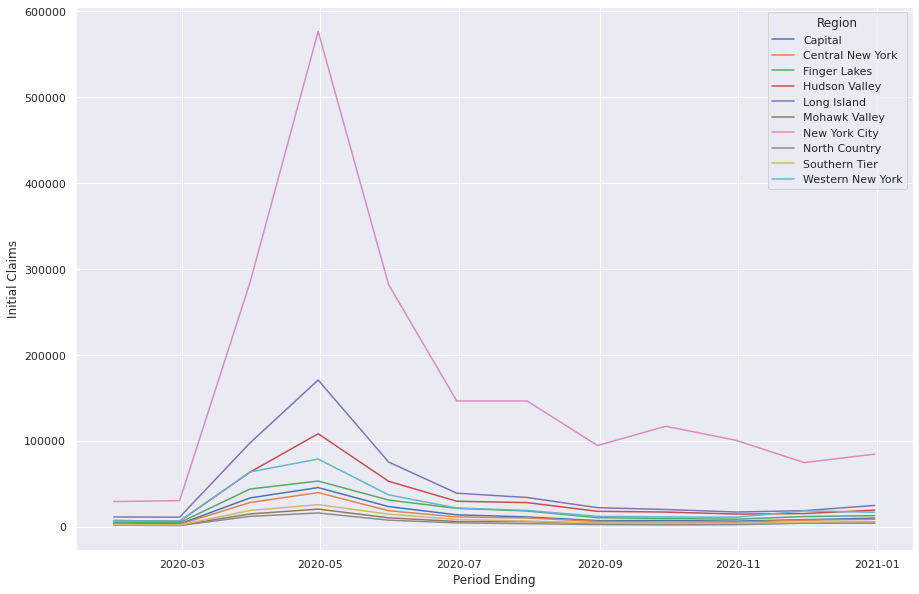

In [ ]:
sns.lineplot(
    x = df_2020.index,
    y = df_2020['Initial Claims'],
    hue = df_2020['Region'],
    ci = False
)
sns.set(rc = {'figure.figsize': (15, 12)});

For all regions, there was a large spike in claims between March and May 2020. Visually, we can see that the number of claims has decreased since May.

#Linear Regression

Reimport dataframe without setting Period Ending as index

In [ ]:
df2 = pd.read_csv(
    '/content/drive/MyDrive/qc/school/CSCI/data credential/projects/data/210128 unemployment insurance.csv'
)

Convert values in Period Ending to datetime objects

In [ ]:
df2['Period Ending'] = pd.to_datetime(df2['Period Ending'])
df2

,Period Ending,Region,Initial Claims
0,2003-07-31,Capital,4326
1,2003-07-31,Central New York,4366
2,2003-07-31,Finger Lakes,7095
3,2003-07-31,Hudson Valley,8454
4,2003-07-31,Long Island,13575
...,...,...,...
2095,2020-12-31,Mohawk Valley,5489
2096,2020-12-31,New York City,84695
2097,2020-12-31,North Country,4286
2098,2020-12-31,Southern Tier,5956


Isolate new dataframe for 2020

In [ ]:
df_test = df2.copy() # Create copy of reimported dataframe to avoid overwriting changes

df_test['Year'] = df_test.loc[:, 'Period Ending'].dt.year
df_2020_2 = df_test.loc[df_test['Year'] == 2020]            # Source for datetime wrangling: Hong from Slack
df_2020_2

,Period Ending,Region,Initial Claims,Year
1980,2020-01-31,Capital,3961,2020
1981,2020-01-31,Central New York,3555,2020
1982,2020-01-31,Finger Lakes,5365,2020
1983,2020-01-31,Hudson Valley,7461,2020
1984,2020-01-31,Long Island,11537,2020
...,...,...,...,...
2095,2020-12-31,Mohawk Valley,5489,2020
2096,2020-12-31,New York City,84695,2020
2097,2020-12-31,North Country,4286,2020
2098,2020-12-31,Southern Tier,5956,2020


Add Ordinal column so regression plot can read data

In [ ]:
lr_2020 = df_2020_2.copy()
lr_2020['Ordinal'] = df_2020_2['Period Ending'].apply(lambda x: x.toordinal()) # Converts datetime objects to ordinals and adds column. Source: Team 1 (?) from class
lr_2020

,Period Ending,Region,Initial Claims,Year,Ordinal
1980,2020-01-31,Capital,3961,2020,737455
1981,2020-01-31,Central New York,3555,2020,737455
1982,2020-01-31,Finger Lakes,5365,2020,737455
1983,2020-01-31,Hudson Valley,7461,2020,737455
1984,2020-01-31,Long Island,11537,2020,737455
...,...,...,...,...,...
2095,2020-12-31,Mohawk Valley,5489,2020,737790
2096,2020-12-31,New York City,84695,2020,737790
2097,2020-12-31,North Country,4286,2020,737790
2098,2020-12-31,Southern Tier,5956,2020,737790


###Linear regression plot for 2020

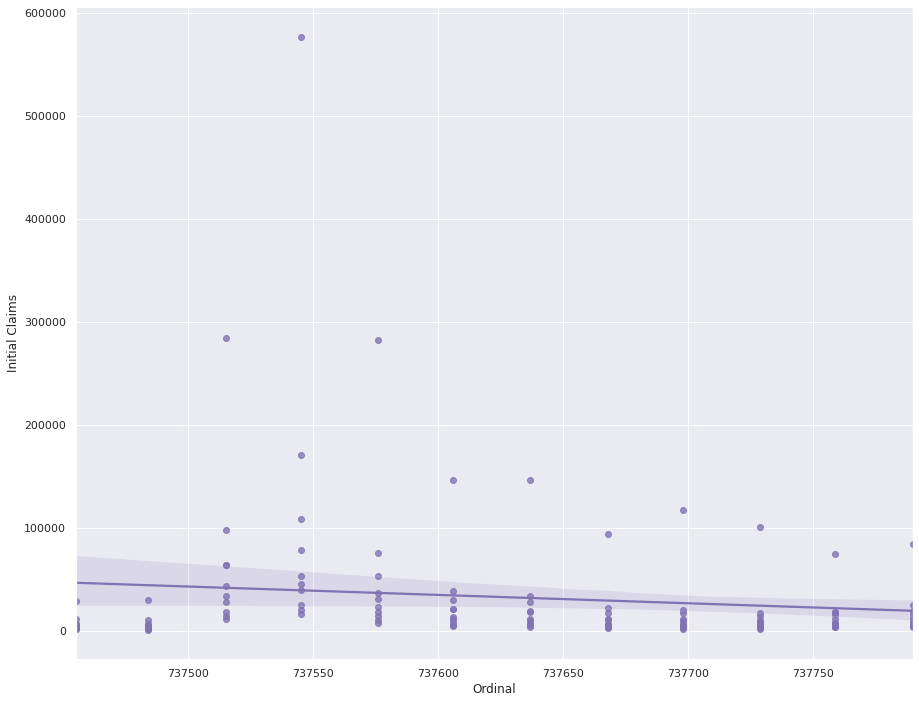

In [ ]:
sns.regplot(
    data = lr_2020,
    x = lr_2020['Ordinal'],
    y = lr_2020['Initial Claims'],
    color = 'm'
)
sns.set(rc = {'figure.figsize': (15, 12)})

Even with the outlier data points in the middle of the year, the regression line for unemployment insurance claims is trending down.

Should future trends follow our model, we will hopefully see continued decreases in unemployment claims throughout 2021.